# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
count = study_results['Mouse ID'].nunique()
count

249

In [4]:
# Combine the data into a single DataFrame
combined_df = pd.merge(study_results,mouse_metadata, how="left", on=["Mouse ID"])
# Display 
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
# Checking the number of mice.
mice_count = combined_df["Mouse ID"].nunique()
mice_count

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_df = combined_df[combined_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicated_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop(combined_df[combined_df['Mouse ID'] == 'g989'].index)
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_count = clean_df['Mouse ID'].nunique()
cleaned_mice_count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tv = clean_df[['Drug Regimen','Tumor Volume (mm3)']].groupby("Drug Regimen").mean().rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume"})
median_tv = clean_df[['Drug Regimen','Tumor Volume (mm3)']].groupby("Drug Regimen").median().rename(columns={"Tumor Volume (mm3)":"Median Tumor Volume"})
variance_tv = clean_df[['Drug Regimen','Tumor Volume (mm3)']].groupby("Drug Regimen").var().rename(columns={"Tumor Volume (mm3)":"Tumor Volume Variance"})
std_dev_tv = clean_df[['Drug Regimen','Tumor Volume (mm3)']].groupby("Drug Regimen").std().rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Dev."})
sem_tv = clean_df[['Drug Regimen','Tumor Volume (mm3)']].groupby("Drug Regimen").sem().rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Err"})

In [10]:
# Assemble the resulting series into a single summary DataFrame.
summary = mean_tv.merge(median_tv,on='Drug Regimen').merge(variance_tv,
                    on='Drug Regimen').merge(std_dev_tv,on='Drug Regimen').merge(sem_tv,
                    on='Drug Regimen')
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count_per_drug = clean_df[['Drug Regimen','Mouse ID']].groupby("Drug Regimen").count().sort_values(by="Mouse ID",ascending=False).reset_index()
mice_count_per_drug 


,Drug Regimen,Mouse ID
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Ceftamin,178
8,Infubinol,178
9,Propriva,148


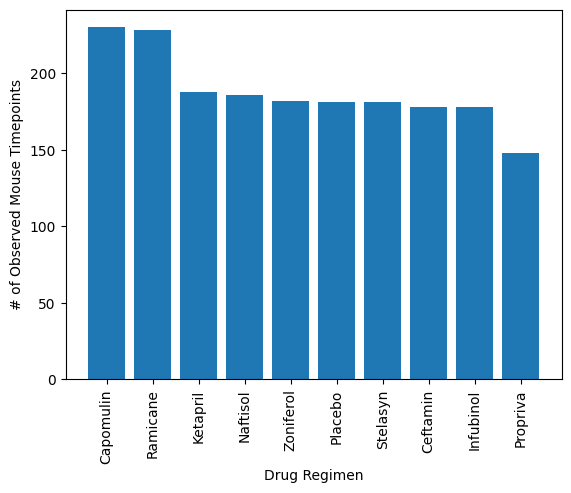

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
fig, ax = plt.subplots()

ax.bar(mice_count_per_drug['Drug Regimen'], mice_count_per_drug['Mouse ID'])
ax.set_ylabel('# of Observed Mouse Timepoints')
ax.set_xlabel('Drug Regimen')

plt.setp(ax.get_xticklabels(), rotation='vertical')
plt.show()

Sex
Male      958
Female    922
Name: count, dtype: int64

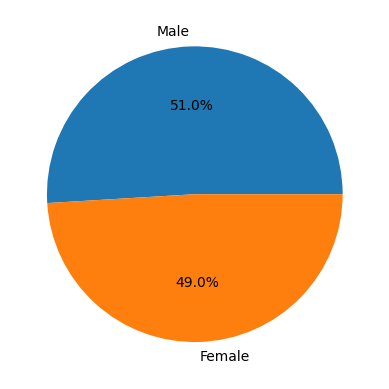

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplotl
mouse_sex = clean_df['Sex'].value_counts()
labels = ["Male","Female"]
plt.pie(mouse_sex, labels=labels, autopct='%1.1f%%')
plt.show
mouse_sex

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
timepoint_mouse = clean_df.groupby('Mouse ID')['Timepoint'].idxmax()
max_timepoint = clean_df.loc[timepoint_mouse].reset_index()
max_timepoint

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,1804,a203,45,67.973419,2,Infubinol,Female,20,23
1,1786,a251,45,65.525743,1,Infubinol,Female,21,25
2,1783,a262,45,70.717621,4,Placebo,Female,17,29
3,1856,a275,45,62.999356,3,Ceftamin,Female,20,28
4,1401,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...,...
243,499,z435,10,48.710661,0,Propriva,Female,12,26
244,1799,z578,45,30.638696,0,Ramicane,Male,11,16
245,1784,z581,45,62.754451,3,Infubinol,Female,24,25
246,1887,z795,45,65.741070,3,Naftisol,Female,13,29


In [20]:
prep_df = max_timepoint[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
# prep_df
four_drug_df = prep_df.loc[(prep_df['Drug Regimen'] == "Capomulin") | (prep_df['Drug Regimen'] == "Ramicane") |
                                (prep_df['Drug Regimen'] == "Infubinol") | (prep_df['Drug Regimen'] == "Ceftamin")].rename(columns={'Tumor Volume (mm3)': 'Final Tumor Volume'})
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
clean_df['Final Tumor Volume'] = four_drug_df['Final Tumor Volume'].astype(int)
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Tumor Volume
0,b128,0,45.000000,0,Capomulin,Female,9,22,67.0
1,f932,0,45.000000,0,Ketapril,Male,15,29,65.0
2,g107,0,45.000000,0,Ketapril,Female,2,29,NaN
3,a457,0,45.000000,0,Ketapril,Female,11,30,62.0
4,c819,0,45.000000,0,Ketapril,Male,21,25,NaN
...,...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25,NaN
1889,u364,45,31.023923,3,Capomulin,Male,18,17,NaN
1890,p438,45,61.433892,1,Ceftamin,Female,11,26,NaN
1891,x773,45,58.634971,4,Placebo,Female,21,30,NaN


In [17]:
four_drug_df

,Mouse ID,Drug Regimen,Final Tumor Volume
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
3,a275,Ceftamin,62.999356
6,a411,Ramicane,38.407618
7,a444,Ramicane,43.047543
...,...,...,...
238,y769,Ceftamin,68.594745
239,y793,Capomulin,31.896238
240,y865,Ceftamin,64.729837
244,z578,Ramicane,30.638696


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumer_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment_list in clean_df
 st(four_drug_df['Final Tumor Volume'])
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


SyntaxError: expected ':' (4106969779.py, line 7)

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

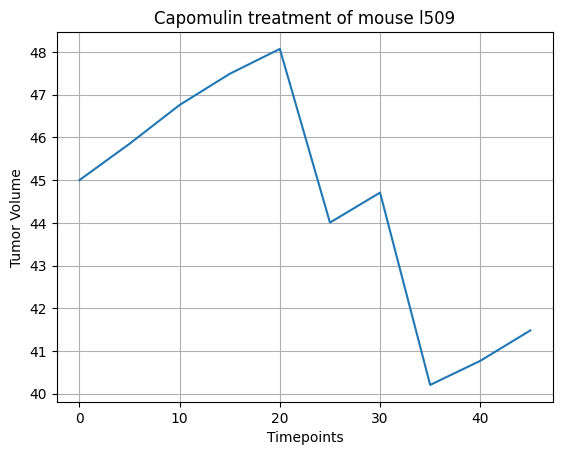

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509 = clean_df.loc[clean_df['Mouse ID'] == "l509"]
fig, ax = plt.subplots()
ax.plot(l509['Timepoint'], l509['Tumor Volume (mm3)'])

ax.set(xlabel='Timepoints', ylabel='Tumor Volume',
       title='Capomulin treatment of mouse l509')
ax.grid()

plt.show()

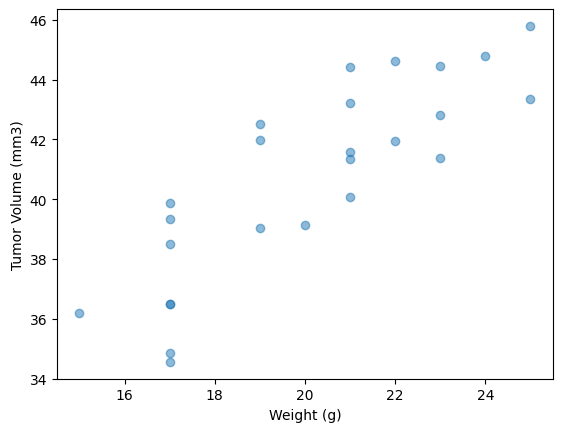

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_total = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
capomulin_ave_vol = capomulin_total[['Mouse ID', 'Tumor Volume (mm3)']].groupby('Mouse ID').mean()
capomulin_ave_weight = capomulin_total[['Mouse ID', 'Weight (g)']].groupby('Mouse ID').mean()
fig, ax = plt.subplots()
plt.scatter(capomulin_ave_weight, capomulin_ave_vol, alpha=0.5)
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [ ]:
import numpy as np

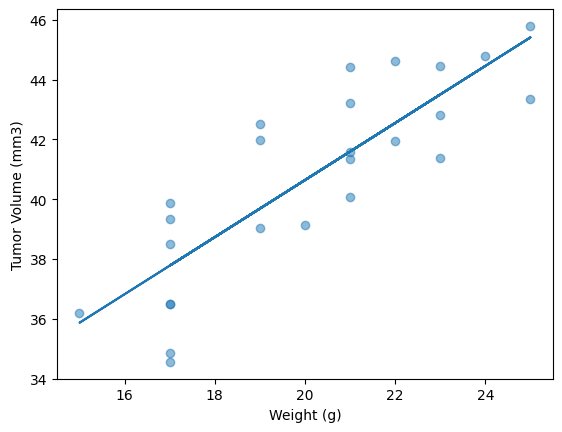

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
fig, ax = plt.subplots()
x = capomulin_ave_weight
y = capomulin_ave_vol
plt.scatter(x, y, alpha=0.5)
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Tumor Volume (mm3)')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x['Weight (g)'], y['Tumor Volume (mm3)'], 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)
plt.show()